<a href="https://colab.research.google.com/github/MartinUlima99/Pandas/blob/main/TempPresentaci%C3%B3nPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importar arhivos**

In [ ]:
#Importar libreria
import pandas as pd

In [ ]:
#importar CSV
df = pd.read_csv("/content/pokemon_data.csv")
df.head(5)

In [ ]:
#importar EXCEL
df = pd.read_excel("/content/pokemon_data.xlsx")
df.tail(5)

In [ ]:
#importar SQL
import sqlite3
conexion = sqlite3.connect("ejemplo.db")
query = "select * from table1 where..."
df = pd.read_sql(query,conexion)
df


In [ ]:
#importar Json
df = pd.read_json("/content/Famous_Words_Twitter_Dataset.json",encoding='utf-8', lines=True)
df

In [ ]:
#importar html table
#https://en.wikipedia.org/wiki/South_America
url = "https://en.wikipedia.org/wiki/South_America"
df = pd.read_html(url,match = 'Flag')
type(df)
#len(df)
df[0]

**DATAFRAME**

In [ ]:
# Crear un DataFrame
data = {'Nombre':   ['Juan', 'María', 'Pedro', 'Ana','Matias','Jack'],
        'Edad': [30, 25, 40, 35,50,90],
        'Altura': [1.75, 1.60, 1.80, 1.65,1.80,1.95],
        'Peso' : [78,65,80,65,83,100],
        'Ciudad': ['Madrid', 'Barcelona', 'Sevilla', 'Valencia','Madrid','Sevilla'],
        'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino','Masculino'],
        'Profesión': ['Ingeniero', 'Doctor', 'Abogado', 'Ingeniero', 'Abogado','Doctor'],
        'Salario': [3000, 5000, 4000, 3500, 4500,6000],
        'Años experiencia': [3, 5, 4, 7, 6,9],
        'Ventas' : [100,900,500,650,1300,350],
        'Año' : [2022,2023,2023,2022,2022,2023]}
df = pd.DataFrame(data)
df

**Manipulación de columnas y filas**

In [ ]:
# Cambiar el nombre de la columna 'Ciudad' a 'Localidad'
df.rename(columns={'Ciudad':'Localidad'},inplace = True)
df

In [ ]:
# Seleccionar solo las filas de las personas mayores de 30 años
mayores = df[df['Edad'] > 30]
mayores

In [ ]:
#Cambiar valor en específico de alguna Fila
df.loc[df['Nombre'] == 'Juan','Nombre'] = "JuanValdes"
#df.at[3,'Nombre'] = "JuanValdes"
#df.replace({'María': 'MariaR'}, inplace=True)#El

df

In [ ]:
# Agregar una columna calculando el índice de masa corporal (IMC) de cada persona
df['IMC'] = (df['Peso'] / (df['Altura'] ** 2))
df


In [ ]:
# Seleccionar solo las filas de las personas con IMC mayor a 25 (sobrepeso)
sobrepeso = df[df['IMC'] > 25]
sobrepeso

In [ ]:
# Eliminar una columna
df.drop('IMC', axis=1, inplace=True)
df

In [ ]:
# Ordenar el DataFrame por nombre
sort = df.sort_values('Nombre')
sort

**Seleccionar de datos en un DataFrame:**

In [ ]:
# Selección de todas las filas y columnas
df_all = df.iloc[::]
df_all

In [ ]:
# Seleccionar filas y columnas específicas
#specific = df.loc[1:3, ["Nombre", "Edad"]]
specific = df.iloc[1:4, [0,1, 5]]

specific


In [ ]:
#Iterar cierta parte del dataframe
temp = df.iloc[0:2]
temp


In [ ]:
# Selección de filas con un columnas en específico
df_cols = df[['Nombre', 'Altura','Edad']]
df_cols

**Filtrado de datos**

In [ ]:
#Filtrar por una columna en específico:
#df.loc[len(df)] = ["Maximo",60,1.83,85,"Roma","Masculino","Arquitecto",6500, 15,1450]
#eliminate a row
#df.drop(7,inplace=True)
filtro_ciudad = df[df['Ciudad'] == "Roma"]
#df
filtro_ciudad
#df_filter

In [ ]:
df

In [ ]:
#Filtrar utilizando múltiples condiciones:
filtro_or = df[ (df['Altura'] > 1.80) | (df['Altura'] < 1.70)]
#filtro_or
#con "and"
filtrado_and = df[(df['Género'] == 'Femenino') & (df['Edad'] >= 30)]
#filtrado_and
nombres = ['Juan','Ana']
filtro_is = df[df['Nombre'].isin(nombres) ]
filtro_is
#df['Altura'] = df['Altura'].astype(float)



,Nombre,Edad,Altura,Peso,Ciudad,Género,Profesión,Salario,Años experiencia
0,Juan,30,1.75,78,Madrid,Masculino,Ingeniero,3000,3
3,Ana,35,1.65,65,Valencia,Femenino,Ingeniero,3500,7


In [ ]:
##Filtrar utilizando expresiones regulares:
import re
filtro_regex = df[df['Nombre'].str.contains(r'^M.+')]
filtro_regex

,Nombre,Edad,Altura,Peso,Ciudad,Género,Profesión,Salario,Años experiencia
1,María,25,1.6,65,Barcelona,Femenino,Doctor,5000,5
4,Matias,50,1.8,83,Madrid,Masculino,Abogado,4500,6


In [ ]:
#Filtrar utilizando la función query():
df['Edad'] = df['Edad'].astype(int)
filtrado_query = df.query('Edad > 30')
filtrado_query

,Nombre,Edad,Altura,Peso,Ciudad,Género,Profesión,Salario,Años experiencia
2,Pedro,40,1.80,80,Sevilla,Masculino,Abogado,4000,4
3,Ana,35,1.65,65,Valencia,Femenino,Ingeniero,3500,7
4,Matias,50,1.80,83,Madrid,Masculino,Abogado,4500,6
5,Jack,90,1.95,100,Sevilla,Masculino,Doctor,6000,9


**Agrupación de datos**

In [ ]:
# Agrupar los datos por ciudad y contar el número de personas en cada ciudad
df_grouped = df.groupby('Ciudad').size()
print(df_grouped)

In [ ]:
# Agrupar los datos por profesión y obtener el salario promedio de cada grupo
#df_grouped = df.groupby('Profesión')['Salario'].mean()
df_grouped = df.groupby('Género')['Edad'].mean()

#print(df_grouped)

### Agrupar los datos por género y obtener la media del salario y la suma de los años de experiencia por grupo
df_grouped = df.groupby('Género').agg({'Salario': 'mean', 'Años experiencia': 'sum'})
print(df_grouped)



In [ ]:
df

**Pivot Tables**

In [ ]:
#crear una tabla básica
pivot_table_basic = df.pivot_table(index='Profesión', columns='Año', values='Ventas') #por defecto trae el promedio
pivot_table_basic

Año,2022,2023
Profesión,,
Abogado,1300.0,500.0
Doctor,NaN,625.0
Ingeniero,375.0,NaN


In [ ]:
pivot_table_intermediate = df.pivot_table(index='Ciudad', columns='Año',
                                          values='Ventas', aggfunc=[sum, len])
#pivot_table_intermediate = df.pivot_table(index='Ciudad', columns='Año',
#                                          values='Ventas', aggfunc={'Ventas': [sum, len],fill_value=0})
print(pivot_table_intermediate)

              sum         len     
Año          2022   2023 2022 2023
Ciudad                            
Barcelona     NaN  900.0  NaN  1.0
Madrid     1400.0    NaN  2.0  NaN
Sevilla       NaN  850.0  NaN  2.0
Valencia    650.0    NaN  1.0  NaN


**Visualización de datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/pokemon_data.csv')
df


In [ ]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
# Gráfico de barras
#filtro = ["Grass","Fire"]
filtro1 = ["Grass"]
filtro2 = ["Poison"]

data = df.loc[ (df['Type 1'].isin(filtro1)) & (df['Type 2'].isin(filtro2)) & (df['Attack'] > 80)]
data


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
76,70,Weepinbell,Grass,Poison,65,90,50,85,45,55,1,False
77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
652,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False


In [ ]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(data['Name'], data['Attack'])
plt.title('Gráfico de Barras')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 1400x600 with 0 Axes>

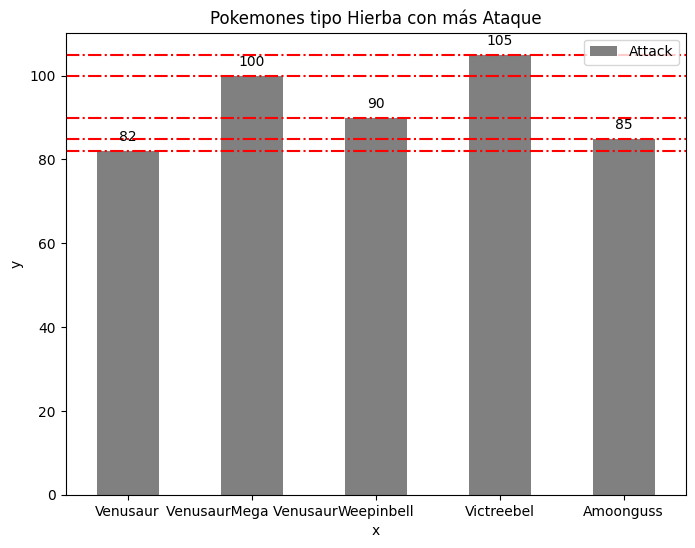

In [ ]:
# Gráfico de barras
plt.figure(figsize=(14, 6))
ax = data.plot(kind='bar', x='Name', y='Attack', figsize=(8, 6),color="gray")
#plt.bar(data['Name'], data['Attack'],color='gray')
plt.title('Pokemones tipo Hierba con más Ataque')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for value in data['Attack']:
  plt.axhline(y=value,color='r',linestyle='-.')

plt.xlabel('x')
plt.ylabel('y')
plt.xticks(rotation='horizontal')
plt.show()

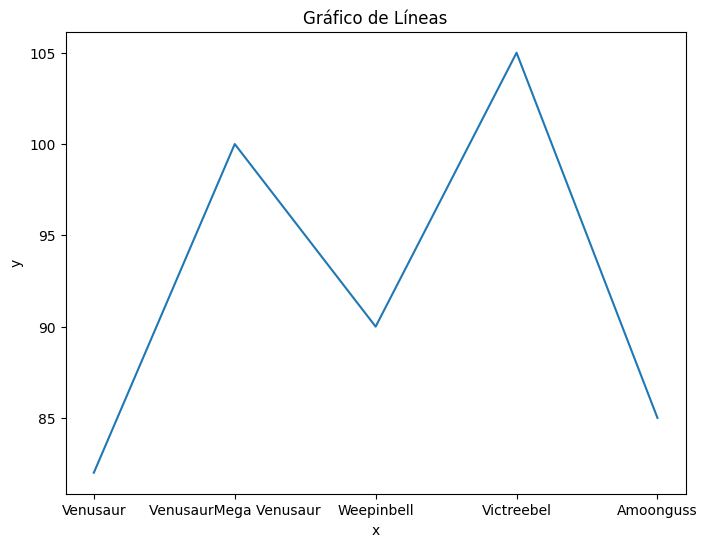

In [ ]:
# Gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(data['Name'], data['Attack'])
plt.title('Gráfico de Líneas')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

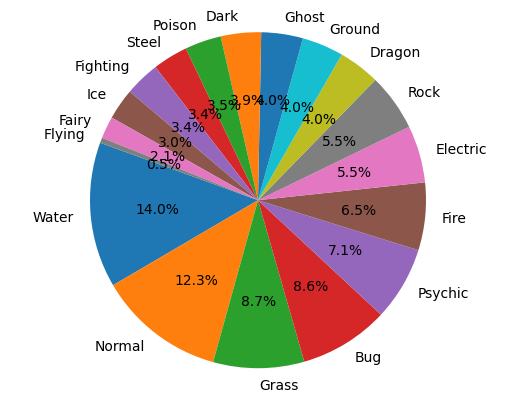

In [ ]:
# Gráfico circular
circular = df['Type 1'].value_counts()
circular

#plt.title('Porcentaje de Pokemones')
#ax = plt.gca()
#ttl = ax.title
#ttl.set_position([.5, 15.95])


etiquetas = circular.index.tolist()
#etiquetas
plt.pie(circular, labels=etiquetas, autopct='%1.1f%%', startangle=160)
#plt.figure(figsize=(8, 6))

plt.axis('equal')


plt.show

**Caso Aplicado**

In [ ]:
#Leer columnas

In [ ]:
#Leer filas